In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# import dataframe
df = pd.read_pickle('analysis.p')
df = df.rename(columns= {'p-PL': 'pPL'})
# dataframe with non-nan alpha values
df = df.query("alpha!=''")
# pull out all alpha values (not nans)
alphaV = df['alpha'].values
# pull out just alphas with corresponding p>0.1
df_alphap = df.query('pPL> 0.1')
alphapV = df_alphap['alpha'].values
# pull out alphas with p>0.1 and ntail>50
alphapnV = df.query('pPL>0.1 and ntail > 50')['alpha'].values

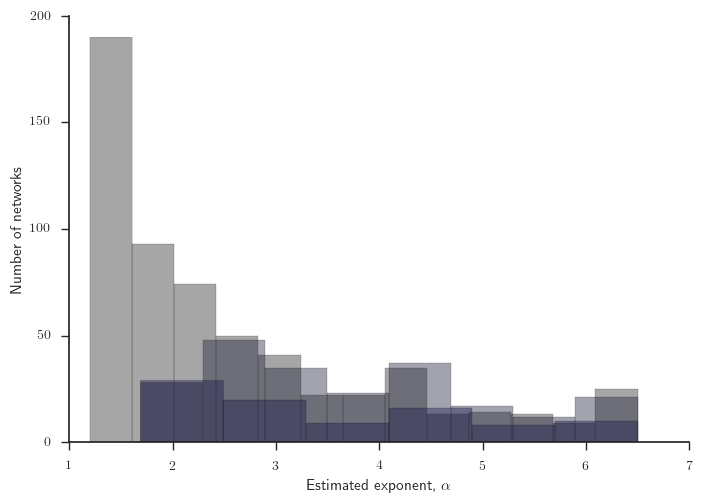

In [124]:
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
# sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_palette(sns.dark_palette("navy"))
sns.set_style('ticks')
fix,ax = plt.subplots()
pairs = [(alphaV, 'blue'), (alphapV, 'g'), (alphapnV, 'y')]
#for a, c in pairs:
for a in [alphaV, alphapV, alphapnV]:
    sns.distplot(a, hist=True, kde=False, ax=ax )
ax.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks')
sns.despine()
plt.show()

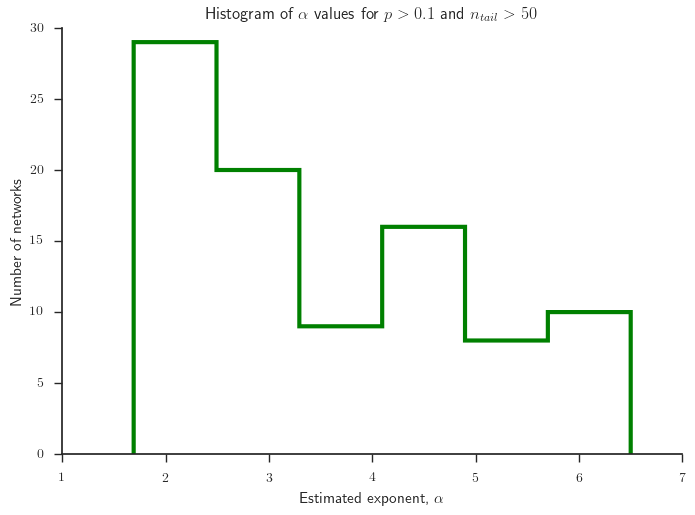

In [125]:
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
# sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_palette(sns.dark_palette("navy"))
sns.set_style('ticks')
fix,ax = plt.subplots()
pairs = [(alphaV, 'blue'), (alphapV, 'g'), (alphapnV, 'y')]
sns.distplot(alphapnV, hist=True, kde=False, ax=ax,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
ax.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks', title=r'Histogram of $\alpha$ values for $p>0.1$ and $n_{tail}>50')
sns.despine()
plt.show()

In [126]:
meanalpha = np.mean(alphaV)
meanalphap = np.mean(alphapV)
meanalphapn = np.mean(alphapnV)
ntail = len(df.query('ntail>50'))
prejtail = len(df.query('pPL<0.1 and ntail>50'))/float(ntail)*100
percent_rejected = (1-(len(alphapV))/float(len(alphaV)))*100
print 'Mean alpha = %s' %meanalpha
print 'Mean alpha for p>0.1 = %s' %meanalphap
print r'Mean alpha for p>0.1 with ntail > 50 = %s' %meanalphapn
print 'Percent of networks that are rejected as power law = %0.2f%%' %percent_rejected
print r'Percent of networks with ntail> 50 that are rejected as power law = %0.2f%%' %prejtail
print 'Total number of networks = %s' %len(alphaV)
print 'Number of networks with p>0.1 = %s' %len(alphapV)
print 'Number of networks with p>0.1 and ntail>50 = %s' %len(alphapnV)

Mean alpha = 2.62830282862
Mean alpha for p>0.1 = 3.72380090498
Mean alpha for p>0.1 with ntail > 50 = 3.58206521739
Percent of networks that are rejected as power law = 63.23%
Percent of networks with ntail> 50 that are rejected as power law = 78.04%
Total number of networks = 601
Number of networks with p>0.1 = 221
Number of networks with p>0.1 and ntail>50 = 92


In [77]:
# import dataframe
df_results = pd.read_pickle('df_results.pkl')
# dataframe with non-nan alpha values
df = df_results.rename(columns = {'PL p-val': 'PLp'})
df = df[pd.notnull(df_results['alpha'])]
# pull out all alpha values (not nans)
alphaV = df['alpha'].values
# pull out just alphas with corresponding p>0.1
df = df.query('PLp > 0.1')
alphapV = df['alpha'].values
# pull out alphas with p>0.1 and ntail>50
df = df.query('ntail > 50')
alphapnV = df['alpha'].values

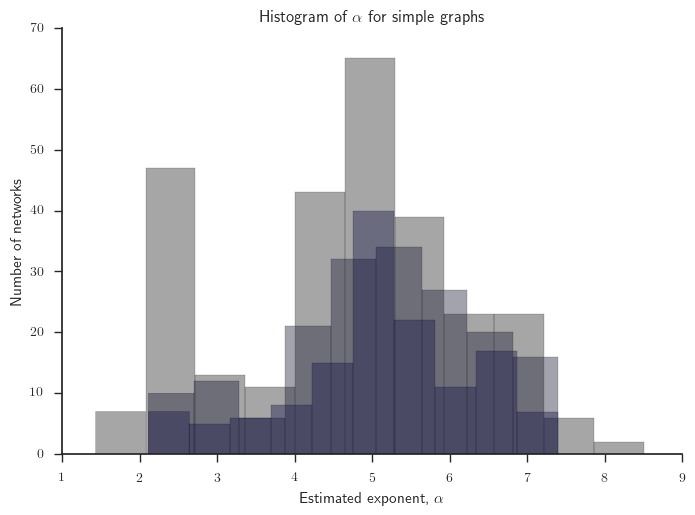

In [78]:
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
# sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_palette(sns.dark_palette("navy"))
sns.set_style('ticks')
fix,ax = plt.subplots()
pairs = [(alphaV, 'blue'), (alphapV, 'g'), (alphapnV, 'y')]
# for a, c in pairs:
for a in [alphaV, alphapV, alphapnV]:
    sns.distplot(a, hist=True, kde=False, ax=ax )
ax.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks', title=r'Histogram of $\alpha$ for simple graphs' )
sns.despine()
plt.show()

In [87]:
# dataframe with non-nan alpha values
df = df_results.rename(columns = {'PL p-val': 'PLp'})
df = df[pd.notnull(df_results['alpha'])]
altot = len(df)
# pull out just alphas with corresponding p<0.1
df = df.query('PLp < 0.1')
alrej = altot-len(df)
alphaV = df.query('PLp>0.1')['alpha']
rejfrac = float(alrej)/altot

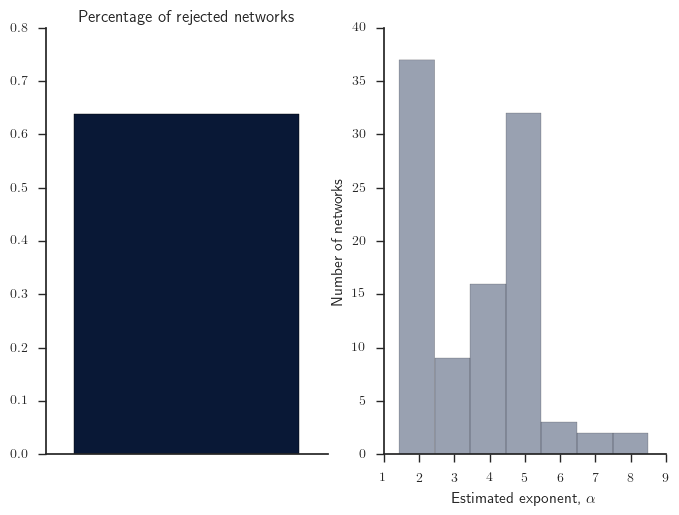

In [82]:
## Plot
fig = plt.figure()
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_style('ticks')
ax1 = fig.add_subplot(1,2,1)
x = [1]
y = [rejfrac]
sns.barplot(x=x, y=y)
ax1.set_xticks([])
y = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
ax1.set_yticks(y)
ax1.set(title='Percentage of rejected networks')
ax2 = fig.add_subplot(1,2,2)
sns.distplot(alphaV, kde=False)
ax2.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks')
sns.despine()
plt.show()

In [104]:
catalog = pd.read_pickle('gmlcatalog.p')
df = catalog.query('Multigraph==1')
len(df)

140